In [ ]:
import _pickle as cPickle

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
save_dir = 'checkpoints_cifar/'
if not os.path.exists(save_dir):
        os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'cifar10_cnn')

In [ ]:
def unpickle(file):
    with open(file, mode='rb') as file1:
        data = cPickle.load(file1, encoding='bytes')

    return data

In [ ]:
data_batch1 = {}
data_batch2 = {}
data_batch3 = {}
data_batch4 = {}
data_batch5 = {}

In [ ]:
data_batch1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch5 = unpickle('cifar-10-batches-py/data_batch_5')

In [ ]:
train =  {}

In [ ]:
def concate_data(data1 ,data2):
    
    concated = np.concatenate((data1, data2), axis = 0)
    return concated

In [ ]:
train_data = concate_data(data_batch1[b'data'], data_batch2[b'data'])
train_data = concate_data(train_data, data_batch3[b'data'])
train_data = concate_data(train_data, data_batch4[b'data'])
train_data = concate_data(train_data, data_batch5[b'data'])

In [10]:
train_data_lables = concate_data(data_batch1[b'labels'], data_batch2[b'labels'])
train_data_lables = concate_data(train_data_lables, data_batch3[b'labels'])
train_data_lables = concate_data(train_data_lables, data_batch4[b'labels'])
train_data_lables = concate_data(train_data_lables, data_batch5[b'labels'])

In [11]:
train['data'] = train_data
train['lables'] = train_data_lables

In [12]:
test_batch = unpickle('cifar-10-batches-py/test_batch')

test_label = []
for i in test_batch[b'labels']  :
    blabel = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
    blabel[i] = 1.
    test_label.append(blabel)

In [13]:
data_label = []
for i in train['lables']:
    blabel = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
    blabel[i] = 1.
    data_label.append(blabel)

In [14]:
train['data'].shape

(50000, 3072)

In [15]:
data_x = train['data'] 

In [16]:
data_label = np.array(data_label)
test_label = np.array(test_label)

In [17]:
test_label.shape

(10000, 10)

In [18]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [19]:
def L2_regulazier(w_var):

    regulazier = sum([tf.nn.l2_loss(w) for w in w_var])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #print(regulazier.eval())
    return regulazier

In [20]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial,)

In [21]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [22]:
var = []

tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('checkpoints/cifar10_cnn.meta')
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sess.run(tf.global_variables_initializer())
    all_vars = tf.trainable_variables()
    for v in all_vars:
        #print("%s with value %s" % (v.name, len(sess.run(v))))
        var.append(sess.run(v))

In [23]:
var[2].shape

(5, 5, 64, 128)

In [24]:
img_size = 32
num_channels = 3

In [25]:
x  = tf.placeholder(tf.float32, [None, 3072])

In [26]:
images = tf.reshape(x, [-1, img_size, img_size, num_channels])
#images = pre_process(images=images, training=True)

In [27]:
W_conv1 = tf.Variable(var[0], name = 'real1')
b_conv1 = tf.Variable(var[1], name = 'real2')

In [28]:
h_conv1 = tf.nn.relu(conv2d(images, W_conv1) + b_conv1 , name = 'h1')
h_pool1 = max_pool_2x2(h_conv1)
h_conv1.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'h1:0' shape=(?, 32, 32, 64) dtype=float32>>

In [29]:
#W_conv1 = weight_variable([5, 5, 3, 64])
#b_conv1 = bias_variable([64])

In [30]:
#W_conv2 = weight_variable([5, 5, 64, 128])
#b_conv2 = bias_variable([128])

#W_conv2 = weight_variable([5, 5, 64, 64])
#b_conv2 = bias_variable([64])

W_conv2 = tf.Variable(var[2], name = 'real3')
b_conv2 = tf.Variable(var[3], name = 'real4')

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
h_pool2.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'MaxPool_3:0' shape=(?, 8, 8, 128) dtype=float32>>

In [31]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*128])

In [32]:
#W_fc1 = weight_variable([8 * 8 * 128, 3072])
#b_fc1 = bias_variable([3072])

W_fc1 = tf.Variable(var[4], name = 'real5')
b_fc1 = tf.Variable(var[5], name = 'bias_b')

h_pool2_flat = tf.reshape(h_pool2, [-1, 8 * 8 * 128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [33]:
h_fc1.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Relu_4:0' shape=(?, 3072) dtype=float32>>

In [34]:
keep_prob = 0.7
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [35]:
#W_fc2 = weight_variable([3072, 10])
#b_fc2 = bias_variable([10])


W_fc2 = tf.Variable(var[6], name = 'w_fc2')
b_fc2 = tf.Variable(var[7], name = 'bias_bfc2')

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [36]:
y_.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>>

In [37]:
y_conv.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'add_12:0' shape=(?, 10) dtype=float32>>

In [38]:
real = tf.argmax(y_,1)

In [39]:
output = tf.argmax(y_conv,1)

## Convolutional Neural Network (a).

In [40]:
f = open('model.txt','r')

In [41]:
listr = [] 
for i in f.readlines():
    listr.append(i.split('\n')[0])

In [42]:
# convert to error rate for plot
train = [1-float(i) for i in listr[1:int((len(listr)-2)/2)]]
test = [ 1-float(i) for i in listr[int((len(listr)-2)/2)+1:int((len(listr)-2))] ]

# accuracy
print('Train Accuracy:', 1-train[-1])
print('Test Accuracy:', 1-test[-1])

Train Accuracy: 0.842
Test Accuracy: 0.6183


In [43]:
def plot_train_test(train_list, test_list, title, y_words):
    
    train_epoches = np.arange(0, len(train_list))
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.plot(train_epoches, train_list, 'b', )
    
    ax2 = ax1.twinx()
    ax2.plot(train_epoches, test_list, 'r', label = 'test')
    
    plt.xlabel('epoches')
    plt.ylabel(y_words)
    plt.title(title)
    plt.legend()
    plt.show()

## Accuracy

<img src='cnn_acc.PNG'></img>

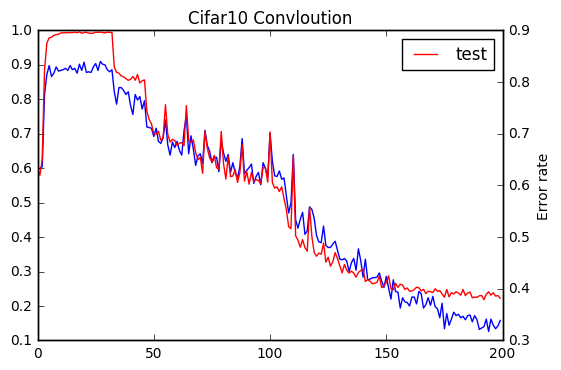

In [44]:
plot_train_test(train, test, 'Cifar10 Convloution' , 'Error rate')